# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognising the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook:

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 ** Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-05-07 06:25:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.15.128, 173.194.76.128, 66.102.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.15.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  48.8MB/s    in 2.1s    

2021-05-07 06:25:37 (48.8 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)


A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualising many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 May  7 06:25 .
drwxr-xr-x 1 root root 4096 May  7 06:25 ..
-rw-r--r-- 1 root root 6148 May  7 06:25 .DS_Store
drwxr-xr-x 4 root root 4096 May  7 06:25 test
drwxr-xr-x 4 root root 4096 May  7 06:25 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [ ]:
 # Let's visualize our images
 import matplotlib.pyplot as plt
 import matplotlib.image as mpimg
 import random

 def view_random_image(target_dir, target_class):
   # Setup the target directory (we'll view images from here)
   target_folder = target_dir + target_class

   # Get random image path
   random_image = random.sample(os.listdir(target_folder), 1)

   # Read in the image and plot it using matplotlip
   img = mpimg.imread(target_folder + "/" + random_image[0])
   plt.imshow(img)
   plt.title(target_class)
   plt.axis("off");
   print(f"Image shape: {img.shape}") # show the shape of the image

   return img




Image shape: (384, 512, 3)


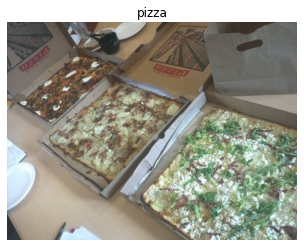

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
img

array([[[ 74,  75,  77],
        [ 91,  92,  94],
        [ 94,  95,  97],
        ...,
        [ 99, 104, 100],
        [102, 107, 103],
        [104, 109, 105]],

       [[ 83,  84,  86],
        [ 84,  85,  87],
        [ 73,  74,  76],
        ...,
        [ 99, 104, 100],
        [101, 106, 102],
        [102, 107, 103]],

       [[ 81,  82,  84],
        [ 80,  81,  83],
        [ 69,  70,  72],
        ...,
        [ 99, 104, 100],
        [101, 106, 102],
        [101, 106, 102]],

       ...,

       [[ 45,  49,  58],
        [ 47,  51,  60],
        [ 49,  53,  62],
        ...,
        [ 87,  83,  74],
        [ 98,  94,  83],
        [112, 108,  97]],

       [[ 45,  49,  58],
        [ 47,  51,  60],
        [ 49,  53,  62],
        ...,
        [ 99,  95,  84],
        [106, 102,  91],
        [112, 108,  96]],

       [[ 44,  48,  57],
        [ 46,  50,  59],
        [ 49,  53,  62],
        ...,
        [110, 106,  95],
        [109, 105,  94],
        [106, 102,  90]]

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 74,  75,  77],
        [ 91,  92,  94],
        [ 94,  95,  97],
        ...,
        [ 99, 104, 100],
        [102, 107, 103],
        [104, 109, 105]],

       [[ 83,  84,  86],
        [ 84,  85,  87],
        [ 73,  74,  76],
        ...,
        [ 99, 104, 100],
        [101, 106, 102],
        [102, 107, 103]],

       [[ 81,  82,  84],
        [ 80,  81,  83],
        [ 69,  70,  72],
        ...,
        [ 99, 104, 100],
        [101, 106, 102],
        [101, 106, 102]],

       ...,

       [[ 45,  49,  58],
        [ 47,  51,  60],
        [ 49,  53,  62],
        ...,
        [ 87,  83,  74],
        [ 98,  94,  83],
        [112, 108,  97]],

       [[ 45,  49,  58],
        [ 47,  51,  60],
        [ 49,  53,  62],
        ...,
        [ 99,  95,  84],
        [106, 102,  91],
        [112, 108,  96]],

       [[ 44,  48,  57],
        [ 46,  50,  59],
        [ 49,  53,  62],
        ...,
        [110, 106,  9

In [ ]:
# View the image shape
img.shape # returns width, height, color channels

(384, 512, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalise) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [ ]:
img = img/255
img

array([[[0.29019608, 0.29411765, 0.30196078],
        [0.35686275, 0.36078431, 0.36862745],
        [0.36862745, 0.37254902, 0.38039216],
        ...,
        [0.38823529, 0.40784314, 0.39215686],
        [0.4       , 0.41960784, 0.40392157],
        [0.40784314, 0.42745098, 0.41176471]],

       [[0.3254902 , 0.32941176, 0.3372549 ],
        [0.32941176, 0.33333333, 0.34117647],
        [0.28627451, 0.29019608, 0.29803922],
        ...,
        [0.38823529, 0.40784314, 0.39215686],
        [0.39607843, 0.41568627, 0.4       ],
        [0.4       , 0.41960784, 0.40392157]],

       [[0.31764706, 0.32156863, 0.32941176],
        [0.31372549, 0.31764706, 0.3254902 ],
        [0.27058824, 0.2745098 , 0.28235294],
        ...,
        [0.38823529, 0.40784314, 0.39215686],
        [0.39607843, 0.41568627, 0.4       ],
        [0.39607843, 0.41568627, 0.4       ]],

       ...,

       [[0.17647059, 0.19215686, 0.22745098],
        [0.18431373, 0.2       , 0.23529412],
        [0.19215686, 0

## An end-to-end example 


* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the VVG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")                             
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 43s 262ms/step - loss: 0.6572 - accuracy: 0.5986 - val_loss: 0.4003 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4507 - accuracy: 0.8088 - val_loss: 0.3418 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4107 - accuracy: 0.8096 - val_loss: 0.3369 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3859 - accuracy: 0.8234 - val_loss: 0.3559 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3373 - accuracy: 0.8720 - val_loss: 0.3157 - val_accuracy: 0.8580


🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above).

In [ ]:
# Epoch 1/5
# 47/47 [==============================] - 96s 2s/step - loss: 0.6229 - accuracy: 0.6287 - val_loss: 0.3752 - val_accuracy: 0.8440


In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

🛠**Practice/exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with theirs: 
https://poloclub.github.io/cnn-explainer/

## Using the model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.30643&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), 
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                            
])

# Compile the model

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 0.9853 - accuracy: 0.5582 - val_loss: 0.4962 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.5251 - accuracy: 0.7553 - val_loss: 0.4711 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4920 - accuracy: 0.7646 - val_loss: 0.4560 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4822 - accuracy: 0.7829 - val_loss: 0.4576 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4890 - accuracy: 0.7775 - val_loss: 0.5191 - val_accuracy: 0.7280


In [ ]:
# Get a summmary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                3010580   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 3,010,801
Trainable params: 3,010,801
Non-trainable params: 0
_________________________________________________________________


🔑**Note:** You can think of trainable parametersas patterns a model can learn from data. Intuitively, you might think more is better. And in lots of cases, it is. 

But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort our and learn the most important patterns in an image.

 So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different features in an image.





## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing and turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline).
7. Repeat until satisfied (experiment, experiment, experiment).


## 1.Become one with the data

Image shape: (512, 384, 3)
Image shape: (384, 512, 3)


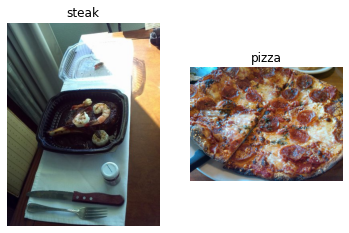

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
tf.keras

<module 'tensorflow.keras' from '/usr/local/lib/python3.7/dist-packages/tensorflow/keras/__init__.py'>

### 2. Preprocess the data (prepare it for a model)


In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~ 10,000 images at one time, a model might only look at 32 at a time. 

It does this for a couple of reasons:
1. 10,000 (images or more) might not fit into your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.


Why 32?

Because 32 is good for your mental health...

In [ ]:
!nvidia-smi

Fri May  7 06:28:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    57W / 149W |   1799MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)



In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you are working with
                                               batch_size=32)      # size of minibatches to load into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next()   # get the "next" batch of image/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.1137255 , 0.11764707, 0.18823531],
          [0.1137255 , 0.11764707, 0.18823531],
          [0.10980393, 0.1137255 , 0.18431373],
          ...,
          [0.95294124, 0.9450981 , 0.9490197 ],
          [0.8235295 , 0.81568635, 0.8196079 ],
          [0.97647065, 0.9686275 , 0.9725491 ]],
 
         [[0.12156864, 0.1254902 , 0.19607845],
          [0.1254902 , 0.12941177, 0.20000002],
          [0.10196079, 0.10588236, 0.1764706 ],
          ...,
          [0.9333334 , 0.92549026, 0.9294118 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [0.9960785 , 0.98823535, 0.9921569 ]],
 
         [[0.09803922, 0.10196079, 0.17254902],
          [0.10588236, 0.10980393, 0.18039216],
          [0.1254902 , 0.13333334, 0.19215688],
          ...,
          [0.8000001 , 0.79215693, 0.7960785 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [1.        , 0.9960785 , 1.        ]],
 
         ...,
 
         [[0.09803922, 0.07843138, 0.09411766],
          [0.07843

In [ ]:
images[30]

array([[[0.03529412, 0.02745098, 0.03137255],
        [0.03921569, 0.03137255, 0.03529412],
        [0.03921569, 0.03137255, 0.03529412],
        ...,
        [0.78823537, 0.73333335, 0.5882353 ],
        [0.5137255 , 0.40000004, 0.23529413],
        [0.48627454, 0.31764707, 0.14901961]],

       [[0.03529412, 0.02745098, 0.03137255],
        [0.03921569, 0.03137255, 0.03529412],
        [0.03921569, 0.03137255, 0.03529412],
        ...,
        [0.5921569 , 0.5294118 , 0.38823533],
        [0.5647059 , 0.44705886, 0.29803923],
        [0.5294118 , 0.36078432, 0.19607845]],

       [[0.03529412, 0.02745098, 0.03137255],
        [0.03921569, 0.03137255, 0.03529412],
        [0.03921569, 0.03137255, 0.03529412],
        ...,
        [0.54901963, 0.46274513, 0.31764707],
        [0.54509807, 0.41176474, 0.2627451 ],
        [0.5137255 , 0.3372549 , 0.1764706 ]],

       ...,

       [[0.69411767, 0.29411766, 0.03529412],
        [0.7176471 , 0.31764707, 0.05882353],
        [0.7176471 , 0

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

Baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting you try to beat the baseline.

>🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with smth simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field of your problem).

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input. Higher equals more complex model
         kernel_size=3, # the size of the sliding windows going across an input.
         strides=1,  # the  size of the step the sliding window takes across an input
         padding="valid", # if "same", output shape is same as input shape, if "valid" ouput shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
Dense

tensorflow.python.keras.layers.core.Dense

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_2 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,   #this is a combination labels and sample data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        )

Epoch 1/5
47/47 [==============================] - 13s 251ms/step - loss: 1.5942 - accuracy: 0.5511 - val_loss: 0.4391 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 11s 244ms/step - loss: 0.4436 - accuracy: 0.7993 - val_loss: 0.3998 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3194 - accuracy: 0.8732 - val_loss: 0.4058 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 11s 243ms/step - loss: 0.1878 - accuracy: 0.9508 - val_loss: 0.5439 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 11s 243ms/step - loss: 0.1455 - accuracy: 0.9528 - val_loss: 0.6556 - val_accuracy: 0.7420


### 5. Evaluating our model

It looks like our model is something, let's evaluate it. 

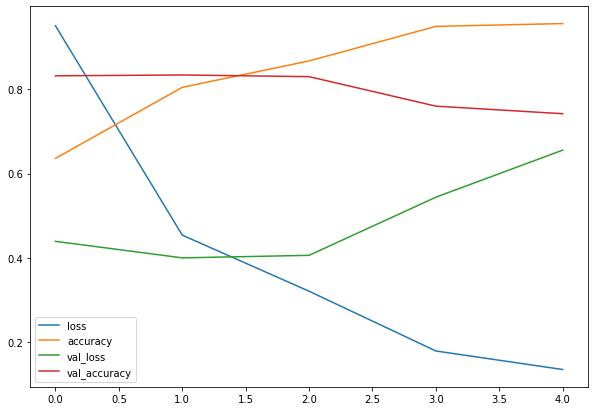

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:

  # Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics."
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"])) # how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


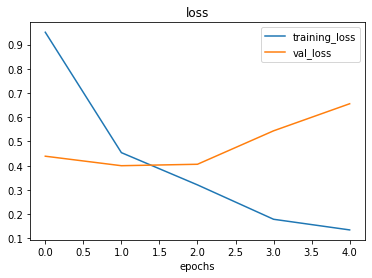

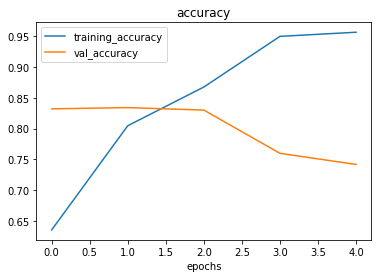

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

>🔑 **Note:** When a model's **validation loss**, it's likely that model is **overfitting** the training data. This means, it's learning the patterns in the training dataset **to well* and thus the model's ability to generalize to unseen data will be diminished.

🔑**Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be overfitting.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of Conv layers
* Increase the number of Conv filters
* Add another dense layer to the output of our flattened layer.


Ways to *reduce* overfitting:
* Add data augmentation 
* Add regularization layers (such as MaxPool2D)
* Add more data...


>🔑 **Note:** Reducing overfitting is also known as **regularization**.



In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                    
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 221ms/step - loss: 0.6460 - accuracy: 0.6099 - val_loss: 0.4973 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4814 - accuracy: 0.7729 - val_loss: 0.3939 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4247 - accuracy: 0.8134 - val_loss: 0.3527 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3997 - accuracy: 0.8331 - val_loss: 0.3447 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3689 - accuracy: 0.8560 - val_loss: 0.3317 - val_accuracy: 0.8580


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6760)             

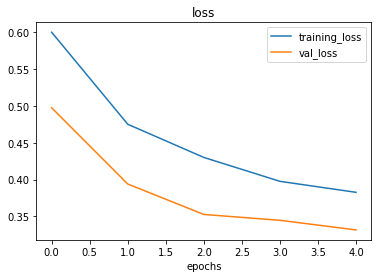

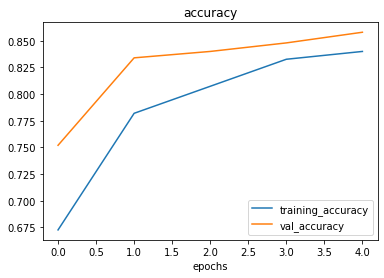

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🔑 **Question** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping or smth else.

### Let's visualize our augmented data

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode="binary",
                                                         shuffle=False)


# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")





Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into model.

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 7


(-0.5, 223.5, 223.5, -0.5)

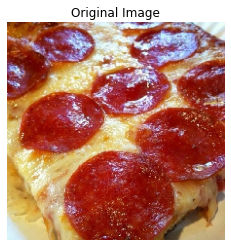

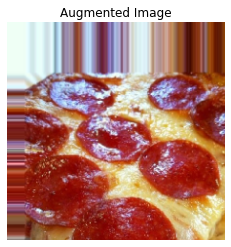

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

No we've seen what augmented data looks like, lets build a model and see how it learns.

In [ ]:
# Build a model on unshuffled data
model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                    
])




In [ ]:
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
history_6 = model_6.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 551ms/step - loss: 0.7090 - accuracy: 0.4633 - val_loss: 0.6910 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 25s 542ms/step - loss: 0.6941 - accuracy: 0.4279 - val_loss: 0.6887 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 25s 540ms/step - loss: 0.6916 - accuracy: 0.5401 - val_loss: 0.6809 - val_accuracy: 0.5080
Epoch 4/5
47/47 [==============================] - 25s 543ms/step - loss: 0.6917 - accuracy: 0.4987 - val_loss: 0.6805 - val_accuracy: 0.6340
Epoch 5/5
47/47 [==============================] - 25s 543ms/step - loss: 0.6911 - accuracy: 0.6142 - val_loss: 0.6724 - val_accuracy: 0.6820


In [ ]:
Dense

tensorflow.python.keras.layers.core.Dense

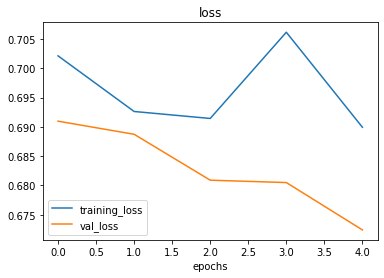

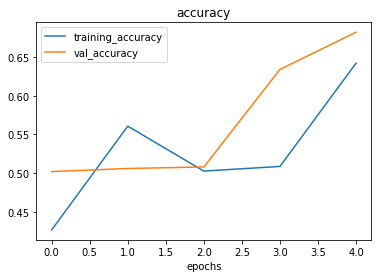

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True) # for demonstration purposes only



Augmented training data
Found 1500 images belonging to 2 classes.


In [ ]:
# Create a model on shuffled augmented data

model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                    
])



In [ ]:
model_7.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
history_7 = model_7.fit(train_data_augmented_shuffled,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 551ms/step - loss: 0.6947 - accuracy: 0.5287 - val_loss: 0.6587 - val_accuracy: 0.5200
Epoch 2/5
47/47 [==============================] - 26s 543ms/step - loss: 0.6290 - accuracy: 0.6200 - val_loss: 0.4349 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 25s 543ms/step - loss: 0.5230 - accuracy: 0.7430 - val_loss: 0.3952 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 26s 544ms/step - loss: 0.4779 - accuracy: 0.7891 - val_loss: 0.3666 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 26s 548ms/step - loss: 0.4758 - accuracy: 0.7731 - val_loss: 0.4266 - val_accuracy: 0.8160


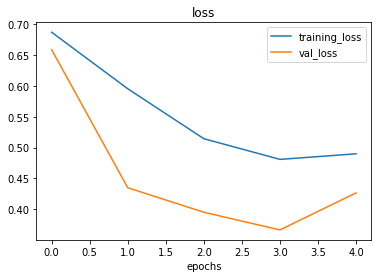

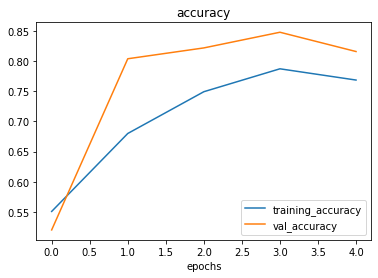

In [ ]:
plot_loss_curves(history_7)

> 🔑**Note:** When shuffling data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learnt and adjust it for our own use case.



In [ ]:
Dense

tensorflow.python.keras.layers.core.Dense

### Making a prediction with our trained model on our own custom data


In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg.1")


In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

In [ ]:
steak.shape

(4032, 3024, 3)

🔑🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels)
  """

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get al values between 0 and 1)
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg.1")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.82164276]], dtype=float32)

In [ ]:
Dense

tensorflow.python.keras.layers.core.Dense

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction.

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names.
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


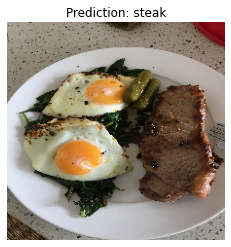

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

### Our model works! Let's try it on another image... this time pizza 🍕

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2021-05-07 06:35:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2021-05-07 06:35:01 (44.2 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2021-05-07 06:35:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2021-05-07 06:35:01 (37.0 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



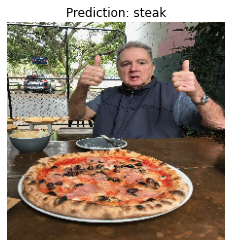

In [ ]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")

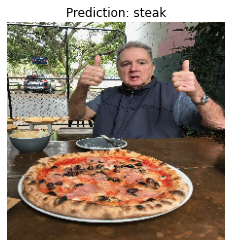

In [ ]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-Class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak),now we're going to step things up a notch with 10 classses of food (multi-class classification)

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model 
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied


### 1. Import and become one with the data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-05-09 09:09:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.128, 74.125.143.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   105MB/s    in 4.8s    

2021-05-09 09:09:39 (103 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 May  9 09:09 .
drwxr-xr-x  1 root root 4096 May  9 09:09 ..
drwxr-xr-x 12 root root 4096 May  9 09:09 test
drwxr-xr-x 12 root root 4096 May  9 09:09 train


In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the subdirectories (these are our class names)
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([tem.name for tem in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlip
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



Image shape: (512, 288, 3)


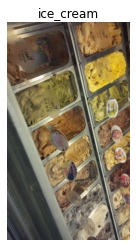

In [ ]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)



In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="categorical", # type of data you are working with
                                               batch_size=32)      # size of minibatches to load into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next()   # get the "next" batch of image/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

235

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.00392157, 0.00392157, 0.        ],
          [0.00392157, 0.00392157, 0.        ],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.5019608 , 0.5137255 , 0.54901963],
          [0.5019608 , 0.5137255 , 0.54901963],
          [0.5019608 , 0.5137255 , 0.54901963]],
 
         [[0.00784314, 0.00784314, 0.        ],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.5019608 , 0.5137255 , 0.5411765 ],
          [0.5019608 , 0.5137255 , 0.54901963],
          [0.5019608 , 0.5137255 , 0.54901963]],
 
         [[0.01568628, 0.01568628, 0.01568628],
          [0.01176471, 0.01176471, 0.01176471],
          [0.01176471, 0.01176471, 0.01176471],
          ...,
          [0.5019608 , 0.5137255 , 0.5411765 ],
          [0.5019608 , 0.5137255 , 0.54901963],
          [0.5019608 , 0.5137255 , 0.54901963]],
 
         ...,
 
         [[0.2627451 , 0.3137255 , 0.2784314 ],
          [0.26666

In [ ]:
images[0]

array([[[0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.5019608 , 0.5137255 , 0.54901963],
        [0.5019608 , 0.5137255 , 0.54901963],
        [0.5019608 , 0.5137255 , 0.54901963]],

       [[0.00784314, 0.00784314, 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.5019608 , 0.5137255 , 0.5411765 ],
        [0.5019608 , 0.5137255 , 0.54901963],
        [0.5019608 , 0.5137255 , 0.54901963]],

       [[0.01568628, 0.01568628, 0.01568628],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.5019608 , 0.5137255 , 0.5411765 ],
        [0.5019608 , 0.5137255 , 0.54901963],
        [0.5019608 , 0.5137255 , 0.54901963]],

       ...,

       [[0.2627451 , 0.3137255 , 0.2784314 ],
        [0.26666668, 0.31764707, 0.28235295],
        [0.2627451 , 0

In [ ]:
labels

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 

## 3. Create a model (start with a baseline)

We've been talking about CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem...?

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_8 = tf.keras.Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")                            
])

In [ ]:
model_8.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data,   #this is a combination labels and sample data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 374s 2s/step - loss: 2.2605 - accuracy: 0.1721 - val_loss: 2.0236 - val_accuracy: 0.2784
Epoch 2/5
235/235 [==============================] - 371s 2s/step - loss: 1.9364 - accuracy: 0.3231 - val_loss: 1.9426 - val_accuracy: 0.3112
Epoch 3/5
235/235 [==============================] - 368s 2s/step - loss: 1.6580 - accuracy: 0.4430 - val_loss: 1.9607 - val_accuracy: 0.3288
Epoch 4/5
132/235 [===============>..............] - ETA: 2:23 - loss: 1.1324 - accuracy: 0.6294

KeyboardInterrupt: ignored

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

### 5. Evaluate the model

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics."
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"])) # how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_8)

### 6. Adjust the model parameters (to beat the baseline / reduce overfitting

Model is not generalizing well to unseen data (overfitting).

So let's try and fix overfitting...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...

* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers.
* **Use data augmentaion** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original)
* **Use trasfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [ ]:
# Simplify the model first
model_8.summary()

In [ ]:
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")                  
])


model_9.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
history_9 = model_9.fit(train_data,   #this is a combination labels and sample data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_9)

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued... 

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential



train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)



In [ ]:
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical",
                                                                   shuffle=True) # for demonstration purposes only






In [ ]:
# Let's create another model but this time we'll fit it on the augmented training data
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [ ]:
model_10.summary()

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,   #this is a combination labels and sample data,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 420s 2s/step - loss: 2.2710 - accuracy: 0.1516 - val_loss: 2.0753 - val_accuracy: 0.2612
Epoch 2/5
235/235 [==============================] - 428s 2s/step - loss: 2.1166 - accuracy: 0.2326 - val_loss: 1.9962 - val_accuracy: 0.2828
Epoch 3/5
235/235 [==============================] - 431s 2s/step - loss: 2.0553 - accuracy: 0.2669 - val_loss: 1.9262 - val_accuracy: 0.3320
Epoch 4/5
235/235 [==============================] - 436s 2s/step - loss: 2.0206 - accuracy: 0.2974 - val_loss: 1.8407 - val_accuracy: 0.3616
Epoch 5/5
235/235 [==============================] - 433s 2s/step - loss: 1.9673 - accuracy: 0.3247 - val_loss: 1.8214 - val_accuracy: 0.3696


In [ ]:
plot_loss_curves(history_10)

NameError: ignored

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves together and trying to improve the validation /test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate 
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)